# Generating Visualizations

In [1]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import matplotlib.ticker as mtick
import plotly.io as pio # need for saving plotly.go as png

In [2]:
# generate random data for testing
card_wins = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(card_wins, None)
card_wins = np.fliplr(card_wins)

card_ties = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(card_ties, None)
card_ties = np.fliplr(card_ties)

trick_wins = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(trick_wins, None)
trick_wins = np.fliplr(trick_wins)

trick_ties = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(trick_ties, None)
trick_ties = np.fliplr(trick_ties)

total_iterations = 1693

In [3]:
vis_dict = {'cards':card_wins, 'cards_ties': card_ties, 'tricks':trick_wins, 
             'tricks_ties':trick_ties, 'n':total_iterations}

In [4]:
def create_heatmap(graph_format:str, save_graphs_together=True):
    '''
    takes in variable graph_format which should be either 'html', 'png', or 'both'. Takes in dictionary with four 
    8x8 arrays (card wins, card ties, trick wins, trick ties) and the number of total iterations. Calls functions
    to create visualizations specified. Saves whichever functions are specified. 
    '''
    
    data = vis_dict # would import dictionary as json
    
    # load data from dictionary
    cards = data['cards']
    cards_ties = data['cards_ties']
    tricks = data['tricks']
    tricks_ties = data['tricks_ties']
    n = data['n']

    # call get_labels function to make array w/ labels
    cards_labels, tricks_labels = get_labels(cards, cards_ties, tricks, tricks_ties)  

    # generate and save html
    if graph_format == 'html' or graph_format == 'both':
        if save_graphs_together == True:
            create_html_merged(cards, cards_labels, tricks, tricks_labels)
        elif save_graphs_together == False:
            create_html_ind(cards, cards_labels, tricks, tricks_labels)
        else:
            print('save type not supported: must be "True" or "False"')

    # generate and save png
    if graph_format == 'png' or graph_format == 'both':
        if save_graphs_together == True:
            create_png_merged(cards, cards_labels, tricks, tricks_labels)
        elif save_graphs_together == False:
            create_png_ind(cards, cards_labels, tricks, tricks_labels)
        else:
            print('save type not supported: must be "True" or "False"')

    # in case of invalid input
    if graph_format != 'html' and graph_format != 'png' and graph_format != 'both':
        print('graph type not supported')
    
    return None

In [5]:
def get_labels(cards, cards_ties, tricks, tricks_ties):
    '''
    create labels for the graph
    '''

    # prep data for labels
    cards_prep = np.round((cards)*100,0)
    cards_ties_prep = np.round((cards_ties)*100,0)
    tricks_prep = np.round((tricks)*100,0)
    tricks_ties_prep = np.round((tricks_ties)*100,0)

    # creating the arrays for labels for cards
    cards_labels = []
    for i in range(8):
        for j in range(8):
            label = str(cards_prep[i][j])[:-2] + '(' + str(cards_ties_prep[i][j])[:-2] + ')'
            cards_labels += [label]
    cards_labels = np.reshape(cards_labels, (8,8))
    cards_labels = np.fliplr(cards_labels) # flip across diagonal
    np.fill_diagonal(cards_labels, "")
    cards_labels = np.fliplr(cards_labels)

    # creating the arrays for labels for tricks
    tricks_labels = []
    for i in range(8):
        for j in range(8):
            label = str(tricks_prep[i][j])[:-2] + '(' + str(tricks_ties_prep[i][j])[:-2] + ')'
            tricks_labels += [label]
    tricks_labels = np.reshape(tricks_labels, (8,8))
    tricks_labels = np.fliplr(tricks_labels) # flip across diagonal
    np.fill_diagonal(tricks_labels, "")
    tricks_labels = np.fliplr(tricks_labels)
    
    return cards_labels, tricks_labels


In [14]:
def create_html_ind(cards, cards_labels, tricks, tricks_labels):
    
    # Create html for cards
    fig = go.Figure(data = go.Heatmap(
                   z = np.flipud(cards), colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   hovertemplate = "%{y}:%{x} win ratio <br />%{z}", name = "", # the name part stops 'trace=0' from popping up
                   text=np.flipud(cards_labels), texttemplate='%{text}',  
                   x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Chance of Winning (and Tying) By Cards<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'My Choice'  
        ),
        yaxis = dict(
            title = "Opponent's Choice"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_cards_.html"
    fig.write_html(path)
    
    fig.show()

#######
    
    # Create html for tricks
    fig = go.Figure(data = go.Heatmap(
                   z = np.flipud(tricks), colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   hovertemplate = "%{y}:%{x} win ratio <br />%{z}", name = "", # the name part stops 'trace=0' from popping up
                   text=np.flipud(tricks_labels), texttemplate='%{text}',  
                   x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Chance of Winning (and Tying) By Tricks<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'Me'  
        ),
        yaxis = dict(
            title = "Opponent"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_tricks_.html"
    fig.write_html(path)

    fig.show()


In [15]:
def create_png_ind(cards, cards_labels, tricks, tricks_labels):

    # Create png for cards
    fig = go.Figure(data = go.Heatmap(
                   z = np.flipud(cards), colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   text=np.flipud(cards_labels), texttemplate='%{text}',  
                   x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Chance of Winning (and Tying) By Cards<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'My Choice'  
        ),
        yaxis = dict(
            title = "Opponent's Choice"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_cards_.png"
    fig.write_image(path)
    
    fig.show()

#######
    
    # Create png for tricks
    fig = go.Figure(data = go.Heatmap(
                   z = np.flipud(tricks), colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   text=np.flipud(tricks_labels), texttemplate='%{text}',  
                   x = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   y = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Chance of Winning (and Tying) By Tricks<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'Me'  
        ),
        yaxis = dict(
            title = "Opponent"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_tricks_.png"
    fig.write_image(path)
    
    fig.show()

    
    return None

In [33]:
def create_html_merged(cards, cards_labels, tricks, tricks_labels):

    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('By Cards', 'By Tricks'))
    
    # Cards heatmap
    heatmap1 = go.Heatmap(z=np.flipud(cards), colorscale='Blues', colorbar=dict(tickformat=".0%",tickfont=dict(color='white')))
    fig.add_trace(heatmap1, row=1, col=1)
    fig.update_traces(heatmap1,
        xgap = 1, ygap = 1)
    
    # Tricks heatmap
    heatmap2 = go.Heatmap(z=np.flipud(tricks), colorscale='Blues', colorbar=dict(tickformat=".0%",tickfont=dict(color='black')))
    fig.add_trace(heatmap2, row=1, col=2)
    fig.update_traces(heatmap2,
        xgap = 1, ygap = 1)
    
    # Cards text
    annotations = []
    for i in range(np.flipud(cards).shape[0]):
        for j in range(np.flipud(cards).shape[1]):
            annotations.append(
                dict(
                    x=j, y=i, text=np.flipud(cards_labels)[i][j], showarrow=False,
                    font=dict(color="black"), xref='x1', yref='y1',
                    xanchor='center', yanchor='middle'
                )
            )
    
    # Tricks text
    for i in range(np.flipud(tricks).shape[0]):
        for j in range(np.flipud(tricks).shape[1]):
            annotations.append(
                dict(
                    x=j, y=i, text=np.flipud(tricks_labels)[i][j], showarrow=False,
                    font=dict(color="black"), xref='x2', yref='y2',
                    xanchor='center', yanchor='middle'
                )
            )
    
    # Update layout with annotations and axis titles
    fig.update_layout(
        title_text=f"Penney's Game: My Chance of Winning (and Tying)<br>Total Games: {total_iterations}",
        annotations=annotations,
        height=600, width=1000,
        showlegend=False,
        plot_bgcolor='white',
        boxgap = 0.1
    )
    
    headings = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR']
    
    # Update axis titles
    fig.update_xaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Me", row=1, col=1)
    fig.update_yaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Opponent", row=1, col=1)
    
    fig.update_xaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Me", row=1, col=2)
    fig.update_yaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     row=1, col=2)
    
    
    path = f"figures/heatmap.html"
    fig.write_html(path)
    
    fig.show()


In [31]:
def create_png_merged(cards, cards_labels, tricks, tricks_labels):

    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('By Cards', 'By Tricks'))
    
    # Cards heatmap
    heatmap1 = go.Heatmap(z=np.flipud(cards), colorscale='Blues', colorbar=dict(tickfont=dict(color='white'), tickformat=".0%"))
    fig.add_trace(heatmap1, row=1, col=1)
    fig.update_traces(heatmap1,
        xgap = 1, ygap = 1)
    
    # Tricks heatmap
    heatmap2 = go.Heatmap(z=np.flipud(tricks), colorscale='Blues', colorbar=dict(tickfont=dict(color='black'), tickformat=".0%"))
    fig.add_trace(heatmap2, row=1, col=2)
    fig.update_traces(heatmap2,
        xgap = 1, ygap = 1)
    
    # Cards text
    annotations = []
    for i in range(np.flipud(cards).shape[0]):
        for j in range(np.flipud(cards).shape[1]):
            annotations.append(
                dict(
                    x=j, y=i, text=np.flipud(cards_labels)[i][j], showarrow=False,
                    font=dict(color="black"), xref='x1', yref='y1',
                    xanchor='center', yanchor='middle'
                )
            )
    
    # Tricks text
    for i in range(np.flipud(tricks).shape[0]):
        for j in range(np.flipud(tricks).shape[1]):
            annotations.append(
                dict(
                    x=j, y=i, text=np.flipud(tricks_labels)[i][j], showarrow=False,
                    font=dict(color="black"), xref='x2', yref='y2',
                    xanchor='center', yanchor='middle'
                )
            )
    
    # Update layout with annotations and axis titles
    fig.update_layout(
        title_text=f"Penney's Game: My Chance of Winning (and Tying)<br>Total Games: {total_iterations}",
        annotations=annotations,
        height=600, width=1000,
        showlegend=False,
        plot_bgcolor='white',
        boxgap = 0.1
    )
    
    headings = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR']
    
    # Update axis titles
    fig.update_xaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Me", row=1, col=1)
    fig.update_yaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Opponent", row=1, col=1)
    
    fig.update_xaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     title_text="Me", row=1, col=2)
    fig.update_yaxes(tickvals=list(range(8)),  
                     ticktext=headings,
                     row=1, col=2)
    
    
    path = f"figures/heatmap.png"
    fig.write_image(path)
    
    fig.show()


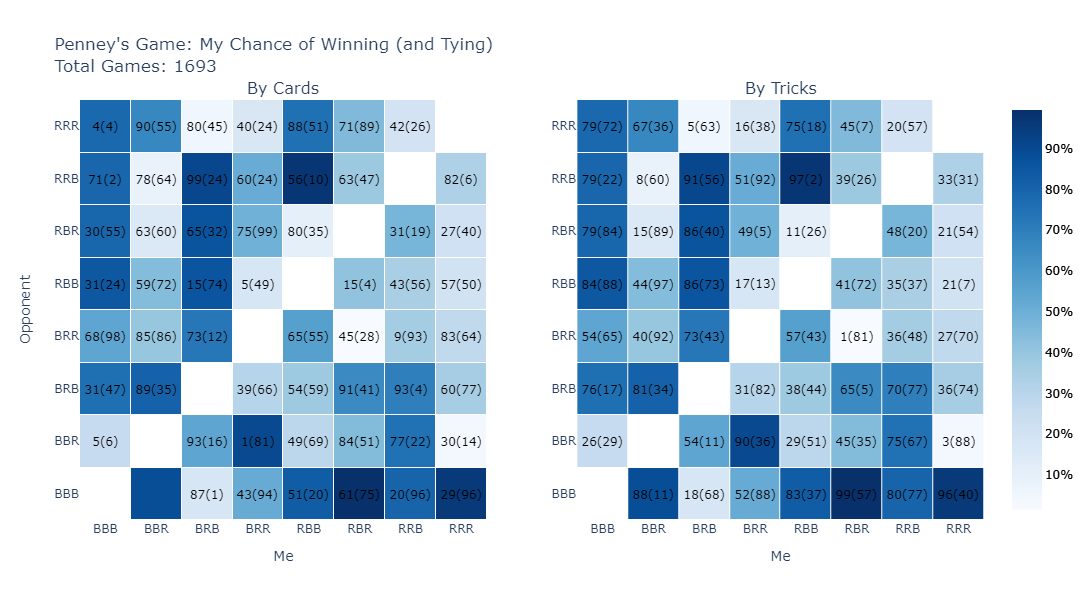

In [32]:
create_heatmap('png')

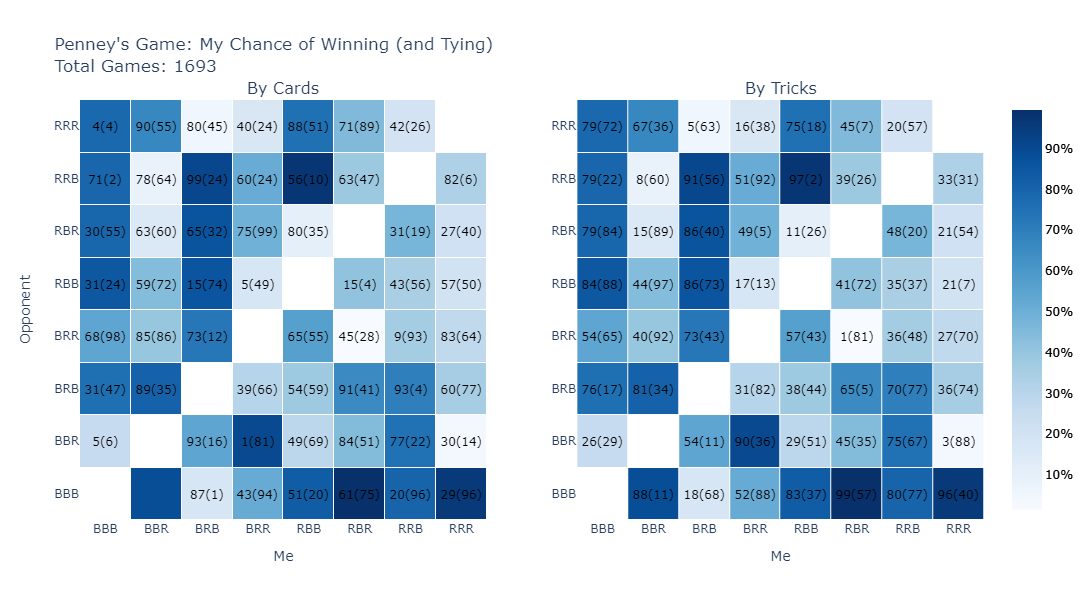

In [34]:
create_heatmap('html')

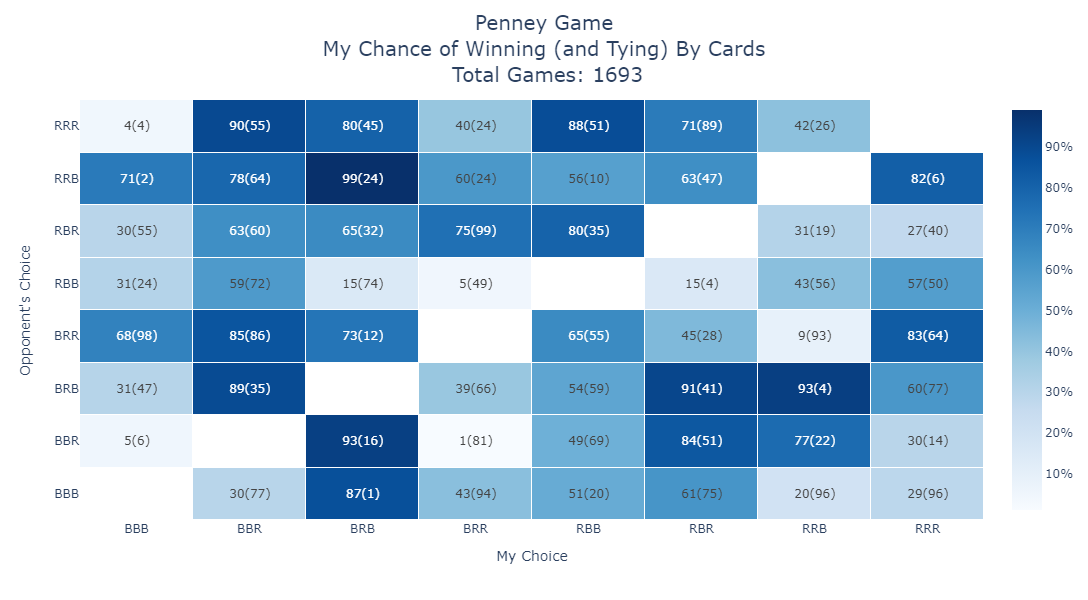

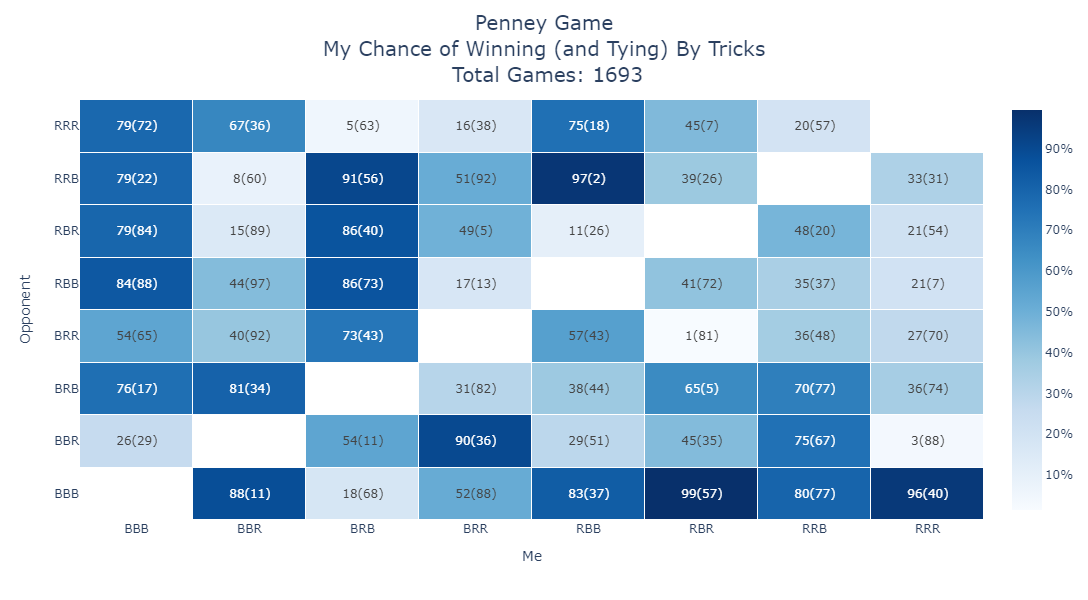

In [35]:
create_heatmap('html', save_graphs_together=False)

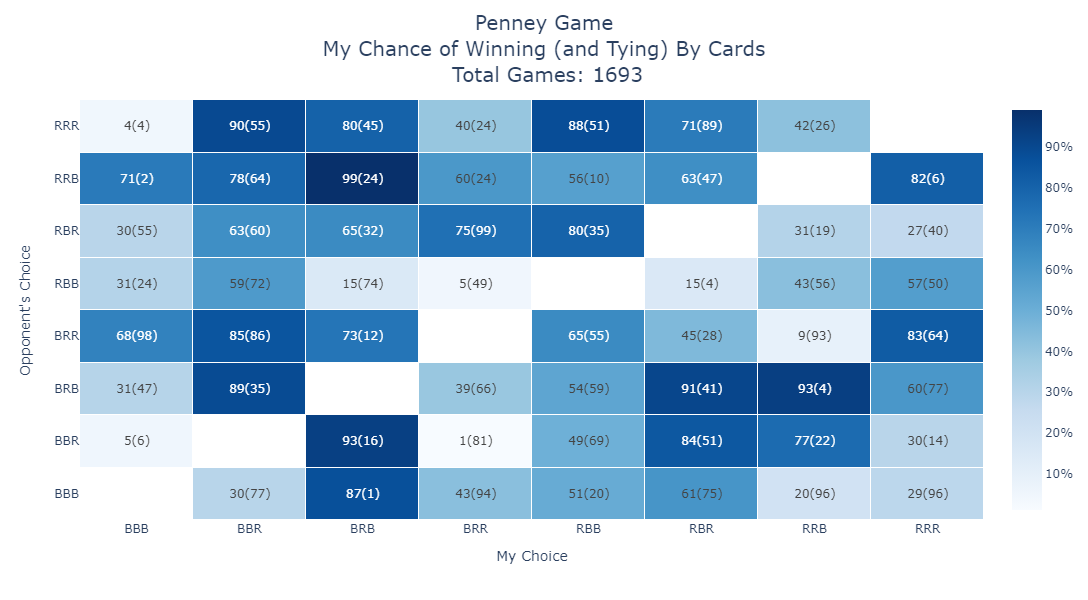

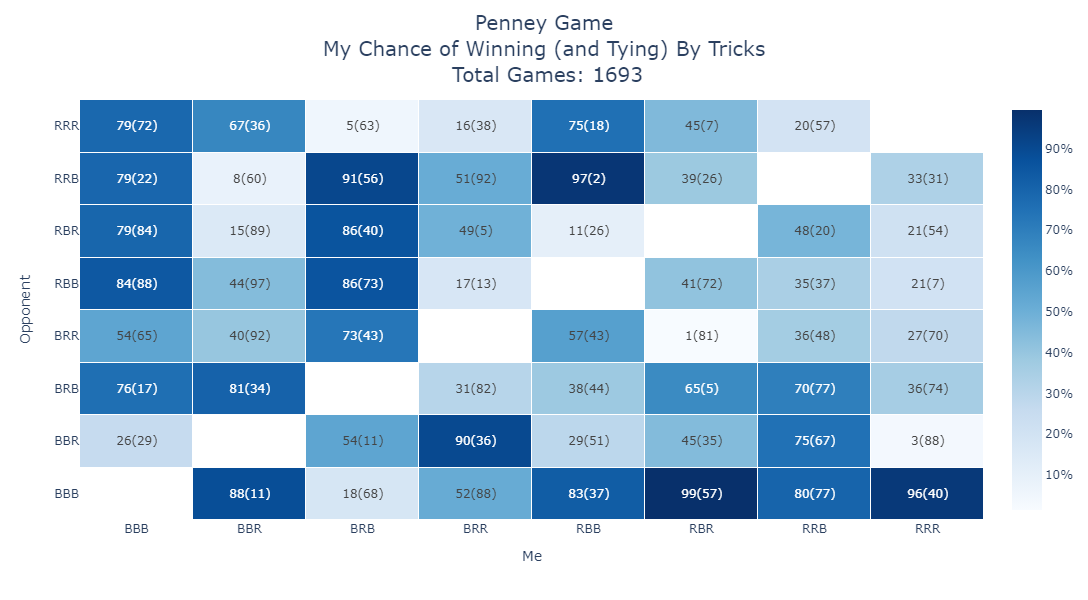

In [36]:
create_heatmap('png', save_graphs_together=False)